**Цель: Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.**

**Описание задания: В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector
%matplotlib inline

# 1. Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [8]:
x_data_generated, y_data_generated = make_classification(scale=1)



---



---



---



# 2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [9]:
cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring="accuracy").mean()

0.8300000000000001



---



---



---



# 3. Используйте статистические методы для отбора признаков:
*   Выберите признаки на основе матрицы корреляции.
*   Отсеките низковариативные признаки (VarianceThreshold).
*   Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [10]:
print(x_data_generated.shape)
print(y_data_generated.shape)

(100, 20)
(100,)


In [11]:
X = np.column_stack((x_data_generated, y_data_generated))
X.shape

(100, 21)

<Axes: >

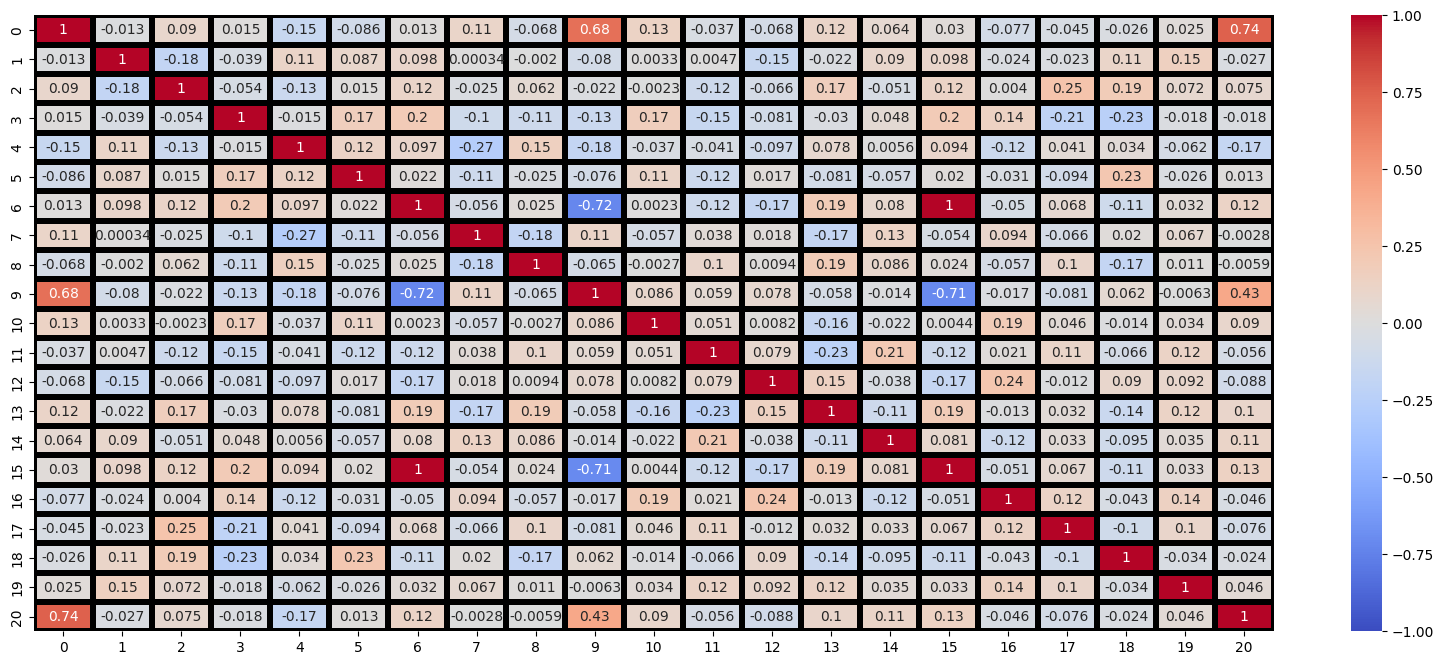

In [12]:
corr_matrix = pd.DataFrame(X).corr()
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center=0, cmap= 'coolwarm', linewidths=3,linecolor='black', ax=ax)

Мы видим сильную корреляцию между парами признаков: 0+9, 6+9, 6+15, 9+15. 20 столбец мы не удаляем, так как это целевой признак. А вот 9 и 15 мы удалим.

In [13]:
df = pd.DataFrame(X)
df = df.loc[:, (df.columns != 9) & (df.columns != 15)]
df.shape

(100, 19)

теперь удалим низковариативные признаки

In [14]:
df.shape
var = VarianceThreshold(threshold=1.)
df2 = var.fit_transform(df)
df2.shape

(100, 13)

Мы видим, что осталось 13 признаков. Вот они:

In [15]:
df2 = pd.DataFrame(df2)
print(df2.head(5))

         0         1         2         3         4         5         6   \
0 -2.189655  0.587270 -0.144203 -0.711814 -2.544478 -0.097164  0.041457   
1  0.939141 -0.373599  0.147930 -1.506435  0.719080 -0.845955  0.046924   
2 -1.104722  0.846824 -1.118027 -0.582835 -2.308328  0.897364 -0.534093   
3  1.065619  1.122852 -0.937100  0.101498 -0.684344  1.218730 -0.216701   
4  1.128628  0.434507 -1.079910 -0.460022  1.448327 -0.205647 -0.548479   

         7         8         9         10        11        12  
0 -0.497095  1.470371 -0.984450  0.287352 -1.442063 -0.187587  
1 -2.195376 -0.450955  0.814311 -0.710889 -1.880953  1.231312  
2 -2.177308  1.461801  0.305772  0.621423  1.512468 -0.820483  
3 -0.976174 -1.029540 -0.737788  0.730264  0.306677 -0.067131  
4  0.576154 -0.601185 -1.859000 -0.373881  0.778450  0.000532  


Целевой признак удаляется функцией fit_transform, поэтому y берем из исходного фрейма. Поэтому принимаем для расчета метрики следующее:

In [16]:
x = df2
y = df[[20]].values.ravel()

In [17]:
cross_val_score(LogisticRegression(), x, y, scoring="accuracy").mean()

0.8400000000000001



---



---



---



# 4. Осуществите отбор признаков на основе дисперсионного анализа:
*   Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
*   Повторите п. 2 на отобранных признаках.

In [18]:
y2 = y_data_generated
x2 = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y2)
print(x2.shape)
cross_val_score(LogisticRegression(), x2, y2, scoring="accuracy").mean()

(100, 5)


0.86



---



---



---



# 5. Отбор с использованием моделей:
*   Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
*   Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
*   Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [19]:
y3 = y_data_generated
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(x_data_generated, y3)
model = SelectFromModel(lsvc, prefit=True)
x3 = model.transform(x_data_generated)
print(x3.shape)
cross_val_score(LogisticRegression(), x3, y3, scoring="accuracy").mean()

(100, 6)


0.8800000000000001

In [32]:
y4 = y_data_generated
x4 = x_data_generated
clf = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state=0, max_features=5)
clf.fit(x4, y4)
for i in range(20):
    print(f"{pd.DataFrame(x4).columns[i]}\t- {clf.feature_importances_[i]:.4f}")
x4 = pd.DataFrame(x_data_generated)[[15, 2, 3, 16, 10]]
print(x4.shape)
cross_val_score(clf, x4, y4, scoring="accuracy").mean()

0	- 0.4588
1	- 0.0157
2	- 0.0186
3	- 0.0190
4	- 0.0396
5	- 0.0362
6	- 0.0199
7	- 0.0284
8	- 0.0268
9	- 0.0754
10	- 0.0183
11	- 0.0110
12	- 0.0364
13	- 0.0314
14	- 0.0290
15	- 0.0133
16	- 0.0144
17	- 0.0310
18	- 0.0312
19	- 0.0455
(100, 5)


0.5



---



---



---



# 6. Перебор признаков:
*   SequentialFeatureSelector.
*   Повторите п. 2 на отобранных признаках.

In [34]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x_data_generated, y_data_generated)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
).fit(x_data_generated, y_data_generated)
feature_names = np.array(pd.DataFrame(x_data_generated).columns)
names = feature_names[sfs_forward.get_support()]
print(names)
x5 = pd.DataFrame(x_data_generated)[[15, 16]]
y5 = y_data_generated
print(x5.shape)
cross_val_score(LogisticRegression(), x5, y5, scoring="accuracy").mean()

[ 0 15]
(100, 2)


0.4800000000000001



---



---



---



# 7. Сформулируйте выводы по проделанной работе:
*   Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [35]:
sum_df = pd.DataFrame(columns=["способ выбора признаков", "кол-во признаков", "средняя точность модели"])

sum_df.loc[len(sum_df)]=['без выбора', 20, 0.83]
sum_df.loc[len(sum_df)]=['удаление корреляций и низковариативных', 13, 0.84]
sum_df.loc[len(sum_df)]=['SelectKBest', 5, 0.86]
sum_df.loc[len(sum_df)]=['SelectFromModel', 6, 0.88]
sum_df.loc[len(sum_df)]=['RandomForestClassifier', 5, 0.5]
sum_df.loc[len(sum_df)]=['SequentialFeatureSelector', 2, 0.48]

sum_df.head(6)

,способ выбора признаков,кол-во признаков,средняя точность модели
0,без выбора,20,0.83
1,удаление корреляций и низковариативных,13,0.84
2,SelectKBest,5,0.86
3,SelectFromModel,6,0.88
4,RandomForestClassifier,5,0.50
5,SequentialFeatureSelector,2,0.48


Мы посмотрели разные способы работы с признаками и по таблице видно, что самая высокая средняя точность модели у с SelectFromModel, т.е. та, где мы выбирали признаки на основе весов важности. Неплохое качество показала модель с  SelectKBest, т.е. та, где мы выбирали функции в соответствии с k наивысшими баллами.

**Общий вывод:** В нашем случае модели, признаки для которых выбирались или весами или k баллами показали себя лучше остальных. *Итог -  Правильная работа с признаками может повысить качество модели*